# 실습 과제
### 과제 1: 회귀 분석
목표: 특정 변수에 대한 선형 회귀 모델을 구축하고 평가합니다.

데이터셋: California Housing dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 선형 회귀 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, MSE와 R^2 점수를 계산합니다.
5. 실제 값과 예측 값을 시각화합니다.

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

In [12]:
# 데이터 로드
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [14]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"len(X_train): {len(X_train)}")
print(df.head())

len(X_train): 16512
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [15]:
# 모델 학습
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [18]:
# 예측
y_pred = lin_reg.predict(X_test)

print(y_pred)

[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [19]:
# 평가
# 예측
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)    # 평균제곱오차
r2 = r2_score(y_test, y_pred)               # 결정계수

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.5558915986952444
R^2 Score: 0.5757877060324508


In [25]:
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_test shape: (4128, 8)
y_test shape: (4128,)


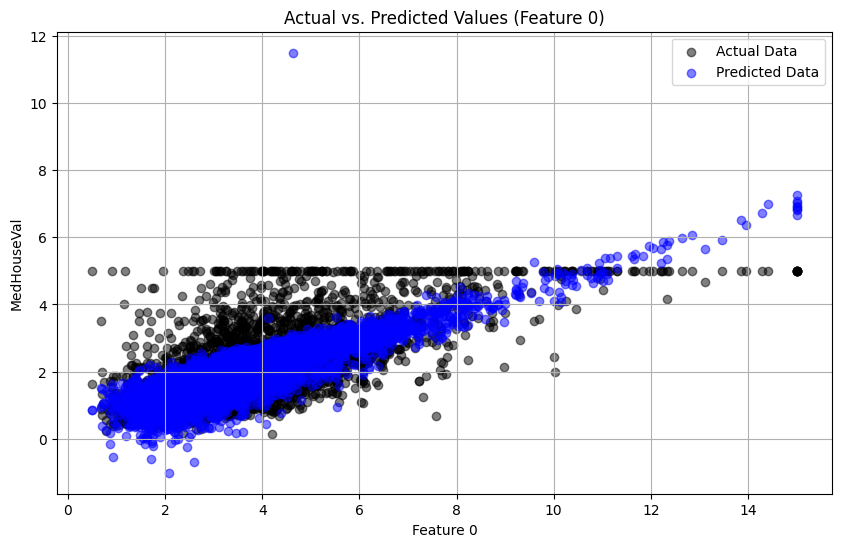

In [28]:
# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='Actual Data', alpha=0.5)
plt.scatter(X_test.iloc[:, 0], y_pred, color='blue', label='Predicted Data', alpha=0.5)
plt.xlabel('Feature 0')
plt.ylabel('MedHouseVal')
plt.legend()
plt.title('Actual vs. Predicted Values (Feature 0)')
plt.grid(True)
plt.show()

### 과제 2: 분류 분석
목표: 특정 데이터에 대한 나이브 베이즈 분류 모델을 구축하고 평가합니다.

데이터셋: Wine dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 훈련 데이터와 테스트 데이터로 분할합니다.
3. 나이브 베이즈 모델을 학습시키고, 테스트 데이터에 대해 예측합니다.
4. 예측 결과를 평가하고, 정확도와 혼동 행렬을 계산합니다.
5. 혼동 행렬을 시각화합니다.


In [29]:
from sklearn.datasets import load_wine

In [30]:
# 데이터 로드
wine = load_wine()
X = wine.data
y = wine.target

In [32]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"len(X_train): {len(X_train)}")
print(df.head())

len(X_train): 142
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [33]:
# 모델
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [34]:
# 예측
y_pred = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]

In [36]:
# 평가 -  혼동 행렬
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 1.0
Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


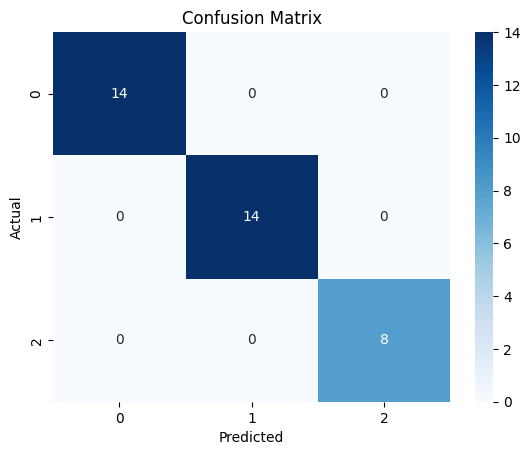

In [38]:
# 시각화
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###과제 3: 교차 검증

목표: 데이터에 대해 교차 검증을 수행하여 모델 성능을 평가합니다.

데이터셋: Diabetes dataset을 사용합니다.

내용:
1. 데이터를 불러오고, 독립 변수(X)와 종속 변수(y)를 설정합니다.
2. 나이브 베이즈 모델을 사용하여 5-겹 교차 검증을 수행합니다.
3. 교차 검증 점수를 출력하고 평균 점수를 계산합니다.
4. 교차 검증 결과를 시각화합니다.


In [39]:
from sklearn.datasets import load_diabetes

In [43]:
# 데이터 로드
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(f"X: {X}")
print(f"y: {y}")

X: [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
y: [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.

In [45]:
# 모델 생성
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
import numpy as np

nb = GaussianNB()

In [46]:
# 교차 검증,  cv = 겹 개수
scores = cross_val_score(nb, X, y, cv=5)

print(f'Cross-validation scores: {scores}')
print(f'Mean CV Score: {np.mean(scores)}')

Cross-validation scores: [0.         0.         0.01136364 0.01136364 0.        ]
Mean CV Score: 0.004545454545454545


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


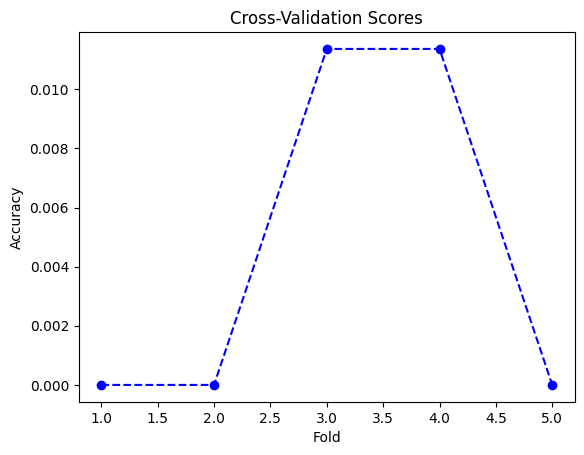

In [47]:
# 시각화
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.show()